In [1]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('modules')
from utils import *

%matplotlib inline    
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
params = {'legend.fontsize': 18,
          'figure.figsize': (12, 8),
          'axes.labelsize':  18,
          'axes.titlesize':  18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'image.cmap':'jet',
          'lines.markersize': 5 }
plt.rcParams.update(params)


# Info about fill

In [2]:
fill_number = 6711
fill_info = get_fill_info(fill_number)

# Tunes

In [3]:
tune_data = get_HS_tunes(fill_number, mode = 'FLATTOP')

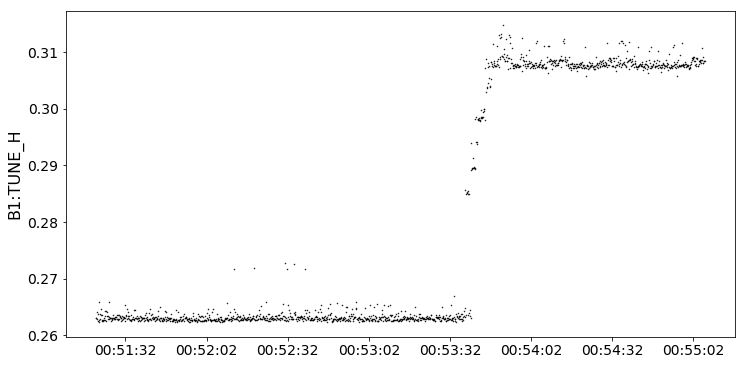

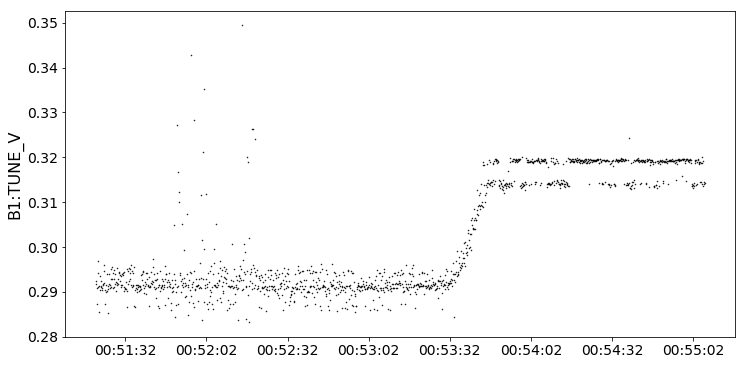

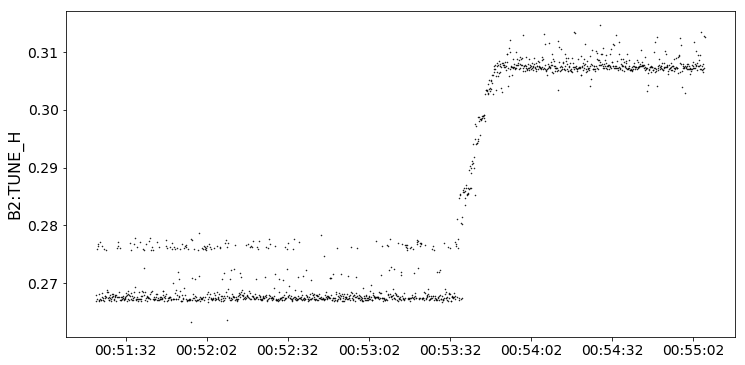

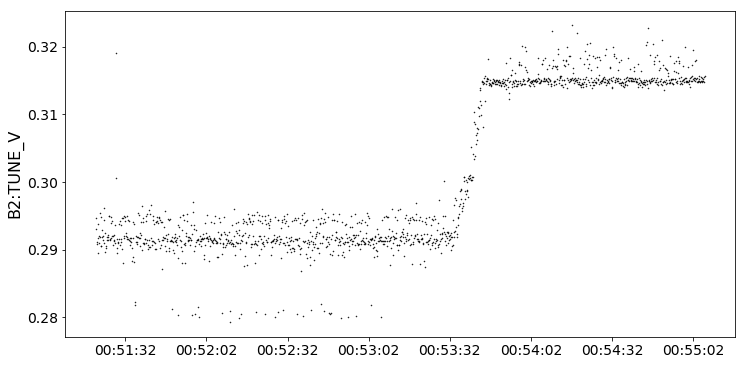

In [4]:
plot_tune_evolution(tune_data, fill_info, vertical_lines=False)

# TbT

In [5]:
modes = ['FLATTOP', 'FLATTOP', 'FLATTOP']
time = {}
time['FLATTOP'] = (fill_info['FLATTOP']['startTime'], fill_info['FLATTOP']['endTime'] ) 

df = get_data(modes, time, rename_duplicates=False)

# Organize 50 Hz h by FFT

In [6]:
df_fft = get_fft(df)

B1 H FLATTOP
B1 V FLATTOP
B2 H FLATTOP
B2 V FLATTOP


# Heatmaps of 50Hz lines

B1 H FLATTOP
300  strongest absolute correlations
Top Absolute Correlations
0   1      0.999559
3   4      0.998456
1   3      0.997622
0   3      0.996598
1   4      0.995483
0   4      0.993973
4   6      0.972995
3   6      0.969902
47  58     0.968002
1   6      0.964878
23  42     0.962710
0   6      0.961997
4   7      0.961902
    5      0.958603
3   7      0.957071
58  59     0.957028
3   5      0.954106
6   7      0.951362
1   5      0.951338
0   5      0.949377
1   7      0.947706
0   7      0.943996
1   2      0.937587
40  42     0.937468
0   2      0.936434
42  52     0.935267
56  58     0.933844
5   6      0.928894
47  59     0.927281
2   3      0.926836
             ...   
34  51     0.668458
48  62     0.667930
95  107    0.667834
52  61     0.666313
69  71     0.663827
40  62     0.663143
39  59     0.662925
60  76     0.661002
48  54     0.660763
30  39     0.660266
44  52     0.659851
38  69     0.659443
95  98     0.658892
51  62     0.658492
50  60     0.657983
31  

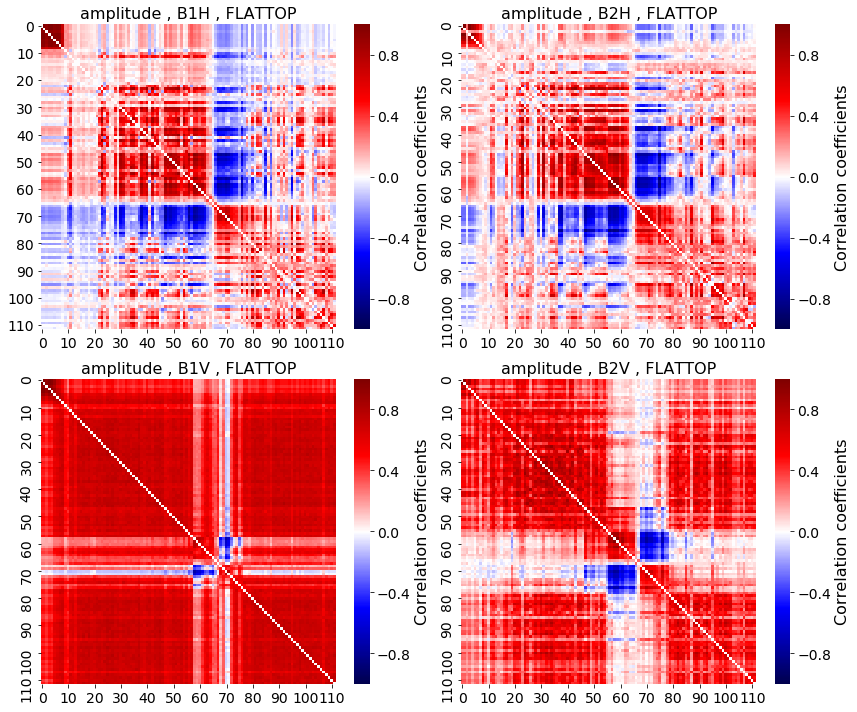

In [8]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True, sharey=True)
corr, strongest, bins, pvals = heatmaps(df_fft, status=['FLATTOP'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', ax=ax)
plt.show()

# Correlation table

In [9]:
def color_max(val):
    if val >0.7:
        color='red'
    else:
        color = 'black'
    return 'color: %s' % color
style1 = corr['B1_H_FLATTOP_amplitude'].style.applymap(color_max)
style1

# Setting thresholds

B1 H FLATTOP1
Threshold set to  0.7
Top Absolute Correlations
0   1     0.999171
3   4     0.998792
1   3     0.998627
0   3     0.997811
1   4     0.996897
0   4     0.995411
4   6     0.973568
3   6     0.970026
1   6     0.965022
0   6     0.961547
4   7     0.961479
58  59    0.957964
3   7     0.955047
6   7     0.954479
47  58    0.949947
1   7     0.947601
4   5     0.944088
0   7     0.943432
1   2     0.942985
0   2     0.940236
1   5     0.939329
2   3     0.938896
3   5     0.937122
2   4     0.936576
0   5     0.935716
5   6     0.934312
40  42    0.927529
5   7     0.926031
47  49    0.919532
23  42    0.919350
            ...   
38  51    0.729557
48  54    0.727170
49  50    0.725620
48  70    0.724984
70  80    0.724791
49  54    0.723585
59  70    0.722780
52  58    0.721806
34  52    0.721583
38  61    0.721571
47  95    0.720935
31  51    0.719446
56  60    0.718583
    95    0.717093
38  57    0.716437
47  67    0.715280
50  61    0.712855
31  58    0.711936
60  61 

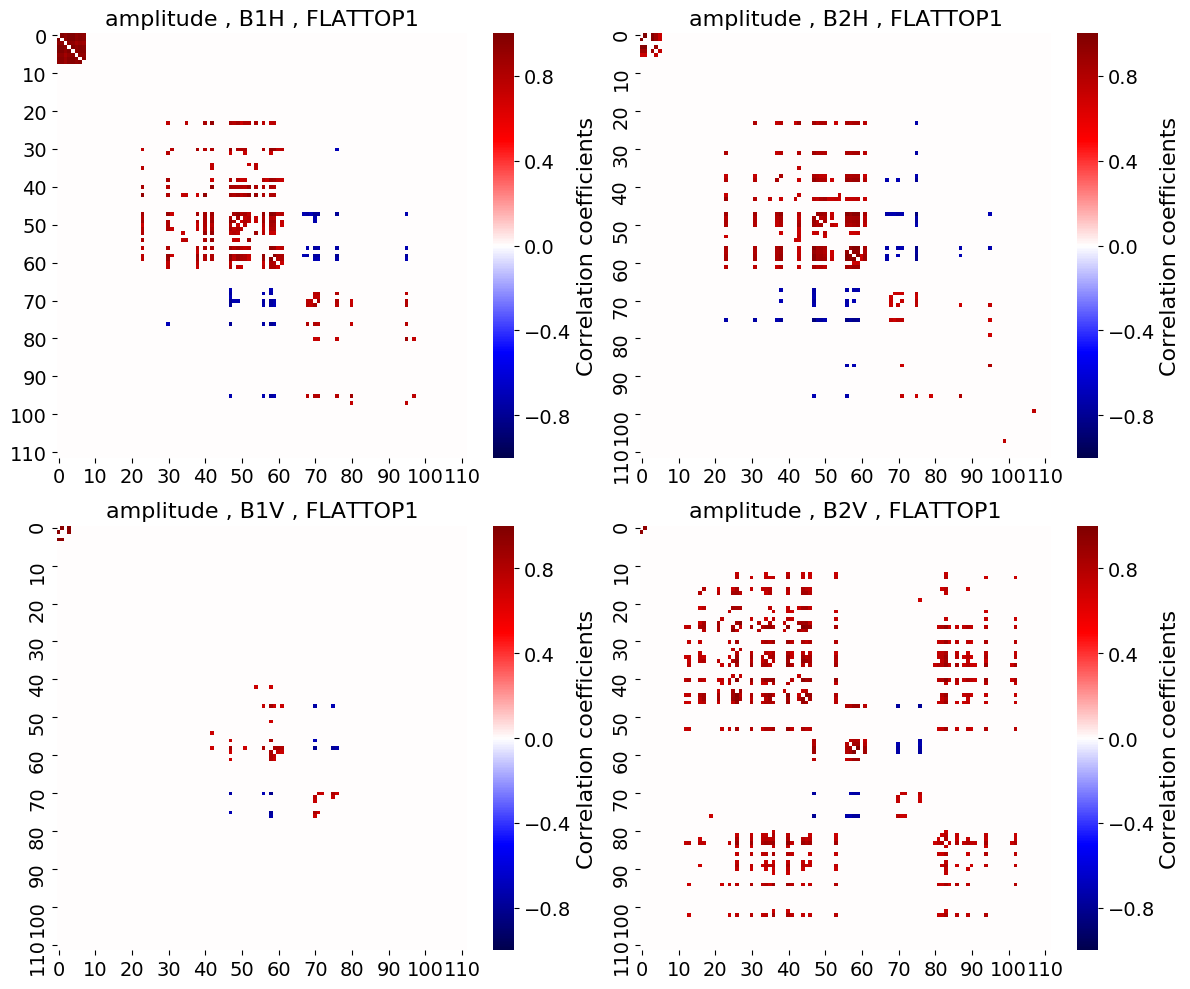

In [28]:
#corr, strongest, bins = heatmaps(df, status=['FLATTOP', 'FLATTOP1', 'FLATTOP2'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold=0.6)
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True, sharey=True)
corr, strongest, bins, pval = heatmaps(df_fft, status=['FLATTOP1'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold = 0.7,  ax=ax,pval_threshold = 0.01)
plt.show()

B1 H FLATTOP2
Threshold set to  0.7
Top Absolute Correlations
0   1      0.999571
3   4      0.997678
1   3      0.995503
0   3      0.993686
1   4      0.992466
0   4      0.990157
4   5      0.958511
    6      0.955006
3   6      0.951423
    5      0.949759
42  80     0.948891
1   6      0.946638
4   7      0.943711
42  97     0.943333
    58     0.943030
0   6      0.941351
3   7      0.940491
1   5      0.939500
0   5      0.938651
23  42     0.935224
80  97     0.931197
42  54     0.928378
1   7      0.927301
0   7      0.922501
6   7      0.922145
23  35     0.921768
    97     0.921754
35  80     0.921080
23  80     0.920230
42  107    0.915890
             ...   
23  30     0.719957
51  98     0.719184
43  54     0.719008
90  107    0.717799
71  97     0.717780
82  97     0.717233
30  34     0.716831
70  107    0.716725
34  44     0.716720
51  82     0.716575
49  58     0.716506
35  92     0.715423
    59     0.715197
    70     0.714020
49  107    0.713979
    54     0.71364

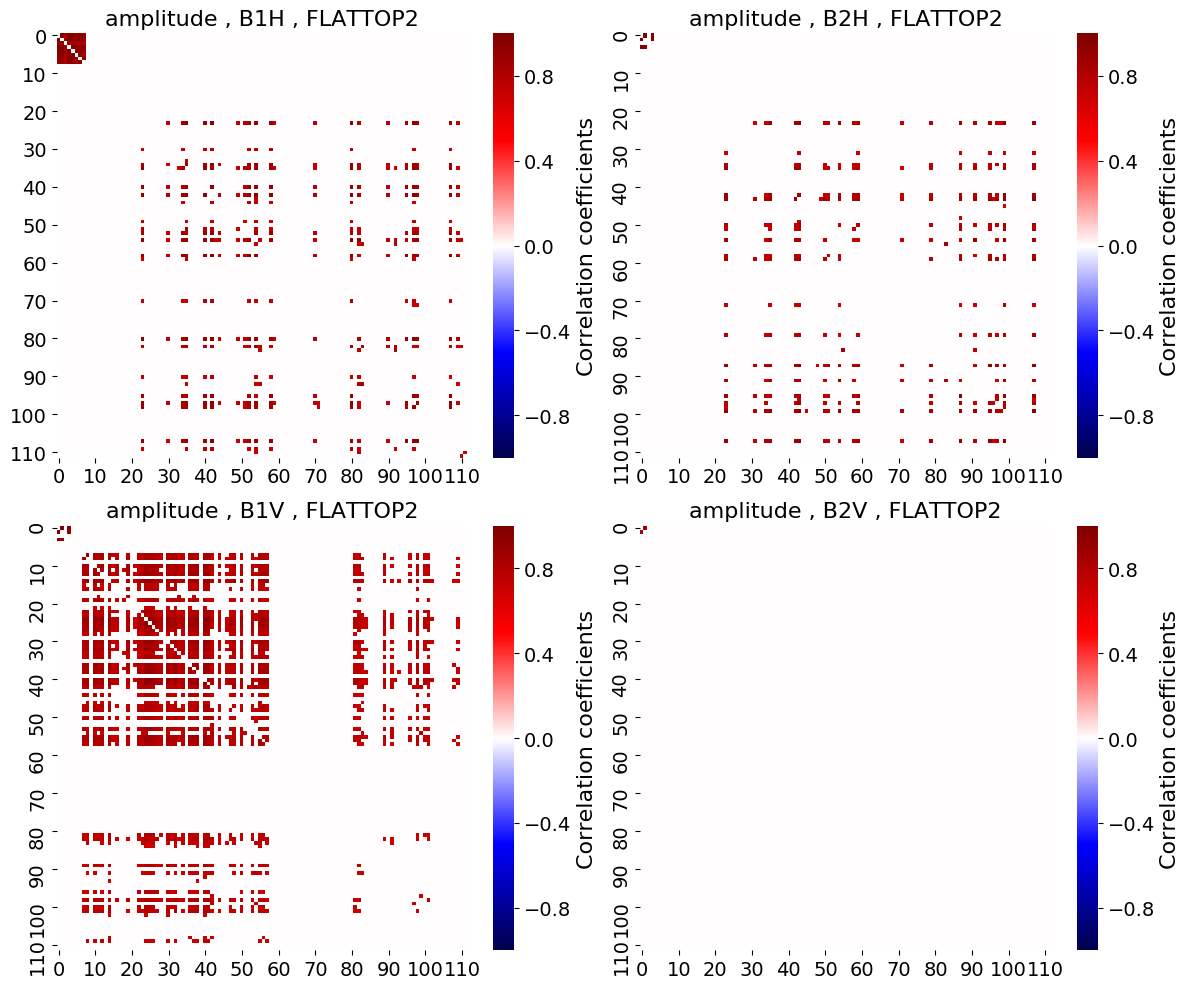

In [29]:
#corr, strongest, bins = heatmaps(df, status=['FLATTOP', 'FLATTOP1', 'FLATTOP2'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold=0.6)
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True, sharey=True)
corr, strongest, bins,pvals = heatmaps(df_fft, status=['FLATTOP2'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold = 0.7,  ax=ax, pval_threshold = 0.01)
plt.show()

# Time evolution of amplitude of strongle correlated harmonics

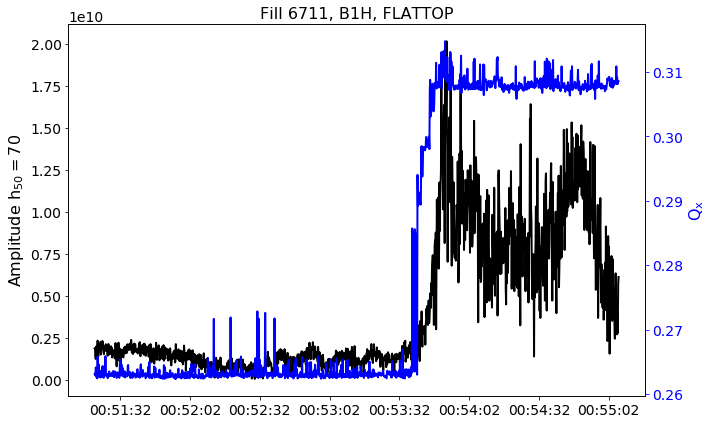

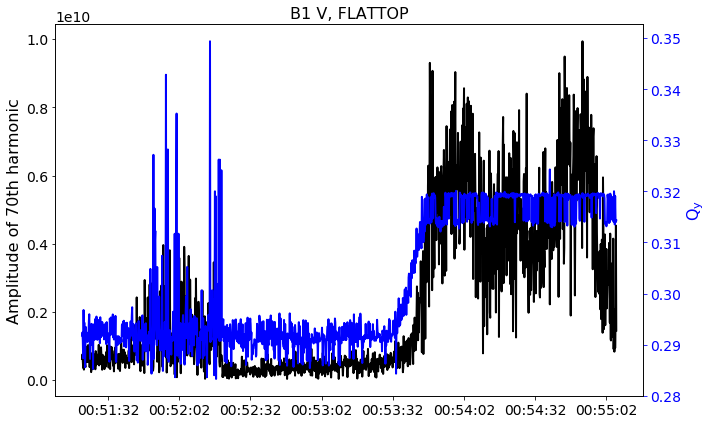

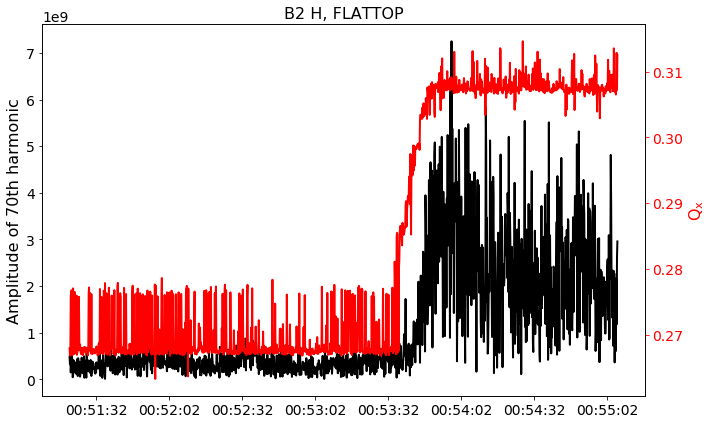

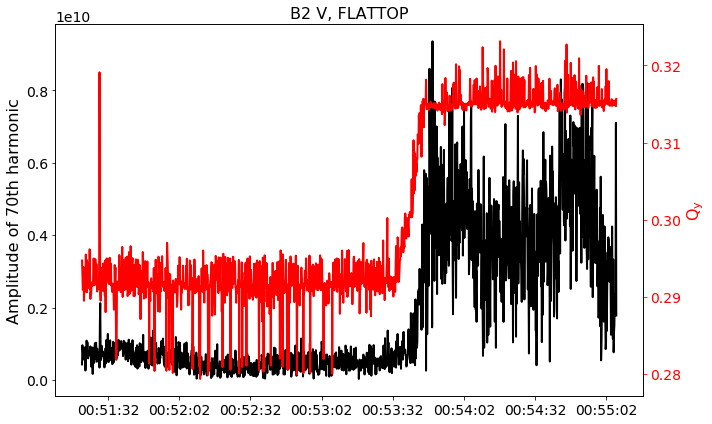

In [26]:
plt.close('all')
#hs =[23, 42, 80, 35]
hs = [70]
fig1, ax1 = plt.subplots(figsize=(10,6))

for harm in hs:
    group = df_fft['h%s' %harm]
    group = group[ (group['beam'] == 'B1') & (group['plane'] == 'H')]
    plt.plot(group.index,group['fourier'].abs(),  c='k')
    #group['fourier'].abs().plot(c='k')
ax2 = ax1.twinx()
ax1.set_ylabel(r'$\rm Amplitude \ h_{50} = 70$')
ax2.set_ylabel(r'$ \rm Q_x$', color='b')
ax2.tick_params('y', colors='b')
tune_data2 = tune_data.dropna(subset =['LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_H'] )
plt.plot(tune_data2.index, tune_data2['LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_H'], c='b')
plt.title('Fill %s, B1H, FLATTOP' %fill_number)
fig1.tight_layout()
plt.show()

hs = [70]
fig1, ax1 = plt.subplots(figsize=(10,6))
for harm in hs:
    group = df_fft['h%s' %harm]
    group = group[ (group['beam'] == 'B1') & (group['plane'] == 'V')]
    plt.plot(group.index,group['fourier'].abs(),  c='k')
ax2 = ax1.twinx()
ax1.set_ylabel('Amplitude of 70th harmonic')
ax2.set_ylabel(r'$ \rm Q_y$', color='b')
ax2.tick_params('y', colors='b')
tune_data2 = tune_data.dropna(subset =['LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_V'] )
plt.plot(tune_data2.index, tune_data2['LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_V'], c='b')
plt.title('B1 V, FLATTOP')
fig1.tight_layout()

plt.show()

fig1, ax1 = plt.subplots(figsize=(10,6))
for harm in hs:
    group = df_fft['h%s' %harm]
    group = group[ (group['beam'] == 'B2') & (group['plane'] == 'H')]
    plt.plot(group.index,group['fourier'].abs(),  c='k')
ax2 = ax1.twinx()
ax1.set_ylabel('Amplitude of 70th harmonic')
ax2.set_ylabel(r'$ \rm Q_x$', color='r')
ax2.tick_params('y', colors='r')
tune_data = get_HS_tunes(fill_number, mode = 'FLATTOP')
tune_data2= tune_data.dropna(subset =['LHC.BQBBQ.CONTINUOUS_HS.B2:TUNE_H'] )

plt.plot(tune_data2.index, tune_data2['LHC.BQBBQ.CONTINUOUS_HS.B2:TUNE_H'], c='r')
plt.title('B2 H, FLATTOP')
fig1.tight_layout()
plt.show()

hs = [70]
fig1, ax1 = plt.subplots(figsize=(10,6))
for harm in hs:
    group = df_fft['h%s' %harm]
    group = group[ (group['beam'] == 'B2') & (group['plane'] == 'V')]
    plt.plot(group.index,group['fourier'].abs(),  c='k')
ax2 = ax1.twinx()
ax1.set_ylabel('Amplitude of 70th harmonic')
ax2.set_ylabel(r'$ \rm Q_y$', color='r')
ax2.tick_params('y', colors='r')
tune_data = get_HS_tunes(fill_number, mode = 'FLATTOP')
tune_data2 = tune_data.dropna(subset =['LHC.BQBBQ.CONTINUOUS_HS.B2:TUNE_V'] )
#print tune_data['LHC.BQBBQ.CONTINUOUS_HS.B2:TUNE_V']
plt.plot(tune_data2.index, tune_data2['LHC.BQBBQ.CONTINUOUS_HS.B2:TUNE_V'], c='r')
plt.title('B2 V, FLATTOP')
fig1.tight_layout()
plt.show()

